# Plot of viscous sublayer height and Kolmogorov length scales

In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np

### Input fluid properties, flow conditions, and characteristic length

In [3]:
density = 1.225
mu = 0.00018
nu=mu/density

#Reference length
L = 1

#Turbulence intensity percentage
IP = 1


In [4]:
### Compute Re for a large velocity vector

In [5]:
#Create velocity vector
#U=np.linspace(10,1500,1000)
U = np.linspace(10,3000,2000)

#Compute Reynolds number using velocity vector
Re = U*L/nu

### Compute boundary layer thickness and integral scales using correlations

In [6]:
#Compute boundary layer thickness using correlation
x = 1
bl_t = (0.37*x)/Re**(1/5)


#Compute integral scale
l0 = 0.4*bl_t


### Compute turbulence intensity using correlation or flat input value

In [7]:
#Compute turbulent intensity

#Turbulence intensity percentage
#IP = 1
I = IP/100

#Pipes correlation
#I = 0.16*Re**(-1./8.)


### Compute $k$, $\epsilon$, $\eta$ (kolmorov lenght scale)

In [8]:
#Compute TKE
k = (3/2)*(U*I)**2


#Compute energy dissipation rate
e = (0.09*k**(3/2))/l0

#Compute Kolmogorov length scale
lenght_kolmogorov = ((nu**3)/e)**(1/4)


### Fix $y^+$ values - Compute $c_f$ using correlations - Estimate $\tau$ and $U_{\tau}$

In [9]:
#Target yplus
yplus1 = 1
yplus5 = 5
yplus7 = 7
yplus10 = 10
yplus30 = 30
yplus100 = 100

#Compute friction coefficient using correlation
cf = 0.058*Re**(-0.2)

#Compute wall shear stresses
tau = 0.5*cf*density*U**2

#Compute shear velcoity
u_tau = (tau/density)**0.5


### Compute distance normal to the wall - Viscous sublayer height for $y^+ < 7$

In [10]:
#Compute normal distance using targe yplus
y1 = (mu*yplus1)/(density*u_tau)
y5 = (mu*yplus5)/(density*u_tau)
y7 = (mu*yplus7)/(density*u_tau)
y10 = (mu*yplus10)/(density*u_tau)
y30 = (mu*yplus30)/(density*u_tau)
y100 = (mu*yplus100)/(density*u_tau)


### Plot viscous sublayer height and Kolmogorov length scales

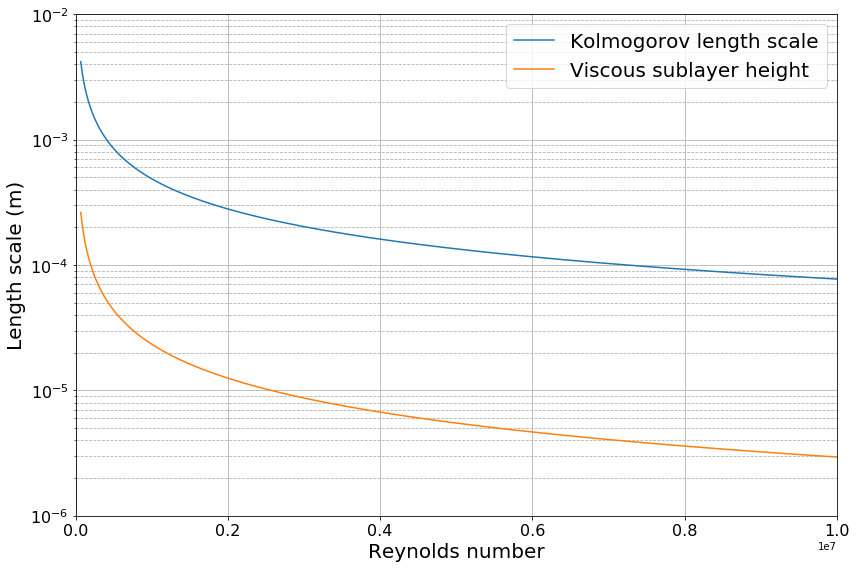

In [11]:
fig = plt.figure()
fig.set_size_inches(12,8)

#plot(data[:,0],data[:,1],'o')

plt.plot(Re[:],lenght_kolmogorov,label='Kolmogorov length scale')
plt.plot(Re[:],y1,label='Viscous sublayer height')


plt.xlim([0, 10000000])
#plt.xlim([0, 20000000])
plt.ylim([0.000001, 0.01])
plt.yscale('log')

plt.xlabel('Reynolds number', fontsize=20)
plt.ylabel('Length scale (m)', fontsize=20)

plt.tick_params(labelsize=16)

plt.legend(loc=0,fontsize=20)

plt.grid()
#plt.grid(True, lw=1, zorder=0)

plt.grid(b=True, which='minor', linestyle='--')

#plt.show() 
plt.tight_layout()

#plt.savefig('f1.pdf', dpi=300)
#fig.savefig('f1.png', dpi=300)
#fig.savefig('f1.svg', dpi=300)

### Add mean free path to previous plot

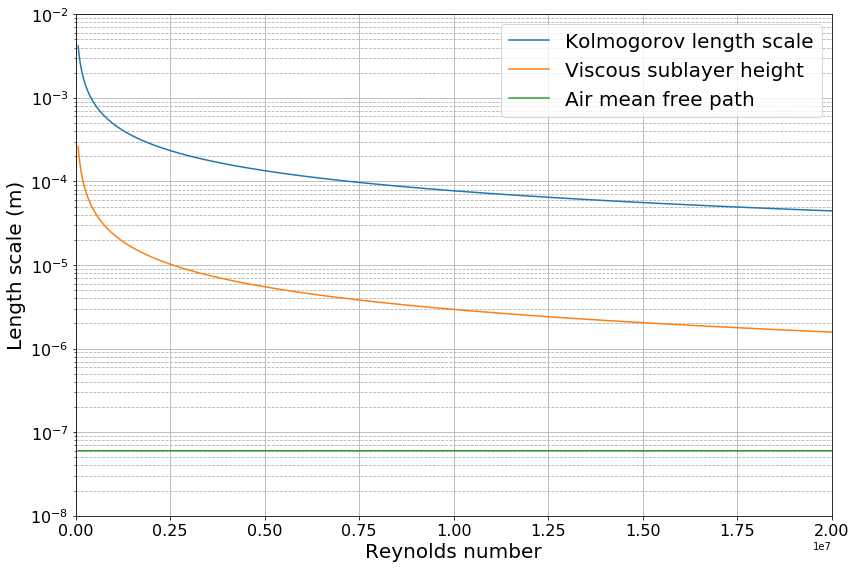

In [12]:
fig = plt.figure()
fig.set_size_inches(12,8)


#Mean free path
mfp = 0*U + 0.00000006


#plot(data[:,0],data[:,1],'o')

plt.plot(Re[:],lenght_kolmogorov,label='Kolmogorov length scale')
plt.plot(Re[:],y1,label='Viscous sublayer height')
plt.plot(Re[:],mfp,label='Air mean free path')


#plt.xlim([0, 10000000])
plt.xlim([0, 20000000])
plt.ylim([0.00000001, 0.01])
plt.yscale('log')

plt.xlabel('Reynolds number', fontsize=20)
plt.ylabel('Length scale (m)', fontsize=20)

plt.tick_params(labelsize=16)

plt.legend(loc=0,fontsize=20)

plt.grid()
#plt.grid(True, lw=1, zorder=0)

plt.grid(b=True, which='minor', linestyle='--')

#plt.show() 
plt.tight_layout()

#plt.savefig('f1.pdf', dpi=300)
#fig.savefig('f1.png', dpi=300)
#fig.savefig('f1.svg', dpi=300)